# apriori关联规则挖掘算法-案例1

frozenset({'A'}) --> frozenset({'B'}) conf: 0.75
frozenset({'C'}) --> frozenset({'A'}) conf: 0.7999999999999999
frozenset({'A'}) --> frozenset({'C'}) conf: 1.0
frozenset({'B'}) --> frozenset({'C'}) conf: 0.7999999999999999
frozenset({'C'}) --> frozenset({'B'}) conf: 0.7999999999999999
frozenset({'D'}) --> frozenset({'B'}) conf: 1.0
frozenset({'B'}) --> frozenset({'E'}) conf: 0.7999999999999999
frozenset({'E'}) --> frozenset({'B'}) conf: 0.7999999999999999
frozenset({'E'}) --> frozenset({'C'}) conf: 0.7999999999999999
frozenset({'C'}) --> frozenset({'E'}) conf: 0.7999999999999999
frozenset({'A'}) --> frozenset({'E'}) conf: 0.75
frozenset({'A'}) --> frozenset({'C', 'B'}) conf: 0.75
frozenset({'A'}) --> frozenset({'C', 'E'}) conf: 0.75


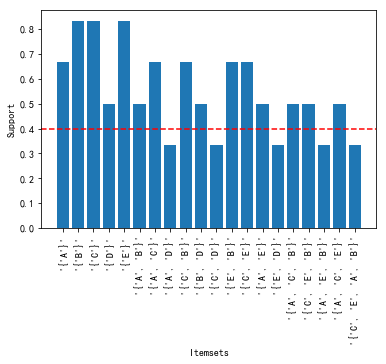

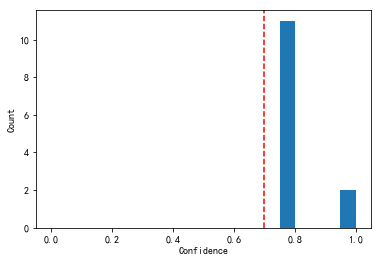

In [11]:
# import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import re
def createC1(dataSet):
    """
    创建大小为1的候选项集C1
    """
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if [item] not in C1:
                C1.append([item])
    C1.sort()
    return list(map(frozenset, C1))
def scanD(D, Ck, minSupport):
    """
    从候选项集Ck中生成频繁项集Lk，并计算支持度
    """
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                if can not in ssCnt:
                    ssCnt[can] = 1
                else:
                    ssCnt[can] += 1
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key] / numItems
        if support >= minSupport:
            retList.append(key)
        supportData[key] = support
    return retList, supportData
def aprioriGen(Lk, k):
    """
    根据频繁项集Lk生成候选项集Ck+1
    """
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):
            L1 = list(Lk[i])[:k - 2]
            L2 = list(Lk[j])[:k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:
                retList.append(Lk[i] | Lk[j])
    return retList
def apriori(dataSet, minSupport=0.5):
    """
    Apriori算法
    """
    C1 = createC1(dataSet)
    D = list(map(set, dataSet))
    L1, supportData = scanD(D, C1, minSupport)
    L = [L1]
    k = 2
    while len(L[k - 2]) > 0:
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = scanD(D, Ck, minSupport)
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData
def generateRules(L, supportData, minConf=0.5):
    """
    生成关联规则
    """
    bigRuleList = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if i > 1:
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList
def calcConf(freqSet, H, supportData, brl, minConf=0.5):
    """
    计算规则的置信度，如果满足最小置信度，则输出规则
    """
    prunedH = []
    for conseq in H:
        conf = supportData[freqSet] / supportData[freqSet - conseq]
        if conf >= minConf:
            print(freqSet - conseq, '-->', conseq, 'conf:', conf)
            brl.append((freqSet - conseq, conseq, conf))
            prunedH.append(conseq)
    return prunedH
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.5):
    """
    对规则进行递归拆分
    """
    m = len(H[0])
    if len(freqSet) > (m + 1):
        Hmp1 = aprioriGen(H, m + 1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if len(Hmp1) > 1:
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)
def plot_support(supportData, minSupport=0.5):
    """
    可视化支持度
    """
    plt.bar(range(len(supportData)), list(supportData.values()), align='center')
    result = [f"'{x}'" for x in supportData.keys()]
    x_result = [x.replace("frozenset(", "").replace(")", "") for x in result]
    plt.xticks(range(len(supportData)),x_result,rotation=90)
    plt.axhline(y=minSupport, color='red', linestyle='--')
    plt.xlabel('Itemsets')
    plt.ylabel('Support')
    plt.show()
def plot_confidence(rules, minConf=0.5):
    """
    可视化置信度
    """
    conf = [rule[2] for rule in rules]
    plt.hist(conf, bins=np.arange(0, 1.05, 0.05))
    plt.axvline(x=minConf, color='red', linestyle='--')
    plt.xlabel('Confidence')
    plt.ylabel('Count')
    plt.show()
# 示例数据集
dataSet = [['A', 'B', 'C', 'D'],
           ['B', 'C', 'E'],
           ['A', 'B', 'C', 'E'],
           ['B', 'D', 'E'],
           ['A', 'B', 'C', 'D', 'E'],
           ['A', 'C', 'E']]
# Apriori算法
L, supportData = apriori(dataSet, minSupport=0.4)
rules = generateRules(L, supportData, minConf=0.7)
# 可视化支持度和置信度
plot_support(supportData, minSupport=0.4)
plot_confidence(rules, minConf=0.7)

# apriori关联规则挖掘算法-案例2

In [21]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
# 加载数据集
data = pd.read_csv('accident.csv',delimiter=',',encoding='GBK')
transactions_dataframe = pd.get_dummies(data)
# 使用Apriori算法挖掘频繁项集
frequent_itemsets = apriori(transactions_dataframe, min_support=0.2, use_colnames=True)
print('----------------------频繁项集-------------------')
print(frequent_itemsets)
# 挖掘关联规则
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print('\n','---------------------关联规则--------------------')
print(rules)

----------------------频繁项集-------------------
     support                                itemsets
0   0.255102                              (事故车型_1轿车)
1   0.510204                            (事故形态_撞中央护栏)
2   0.816327                                (当天天气_晴)
3   0.704082                                 (级别_一般)
4   0.234694                                 (级别_轻微)
5   0.969388                             (发生原因_操作不当)
6   0.214286                      (事故车型_1轿车, 当天天气_晴)
7   0.244898                   (发生原因_操作不当, 事故车型_1轿车)
8   0.397959                    (当天天气_晴, 事故形态_撞中央护栏)
9   0.357143                     (事故形态_撞中央护栏, 级别_一般)
10  0.500000                 (发生原因_操作不当, 事故形态_撞中央护栏)
11  0.571429                         (当天天气_晴, 级别_一般)
12  0.795918                     (发生原因_操作不当, 当天天气_晴)
13  0.683673                      (发生原因_操作不当, 级别_一般)
14  0.224490                      (发生原因_操作不当, 级别_轻微)
15  0.204082           (发生原因_操作不当, 事故车型_1轿车, 当天天气_晴)
16  0.275510             (当天天气_晴, 级别_一般, 事故形态_撞中央护栏)


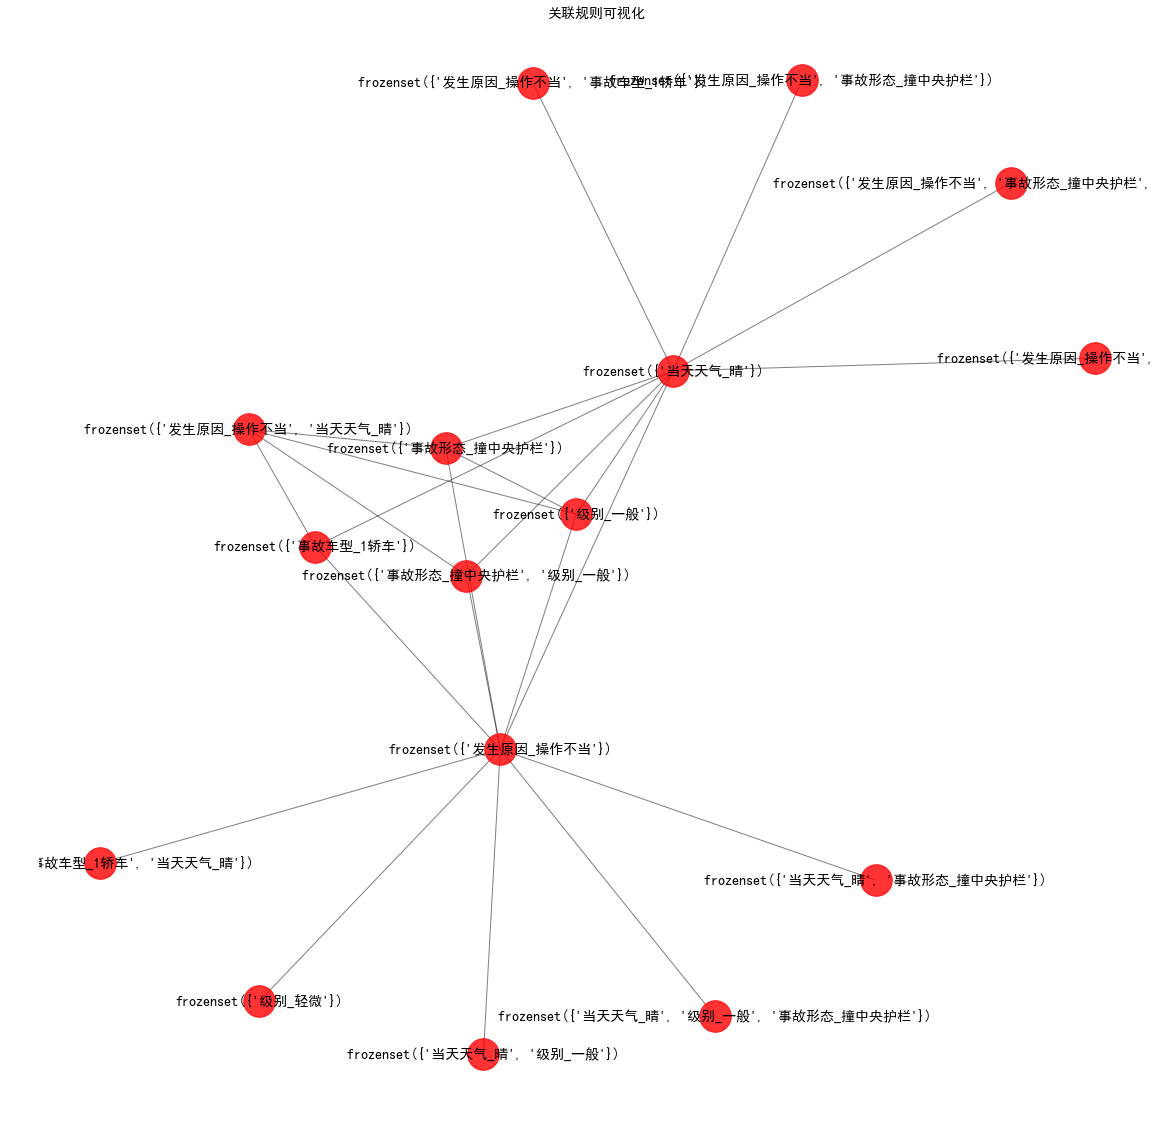

In [44]:
#设置中文字体绘图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 可视化关联规则
fig, ax = plt.subplots(figsize=(20, 20))
GA = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
pos = nx.spring_layout(GA)
nx.draw_networkx_nodes(GA, pos, node_size=1000, alpha=0.8)
nx.draw_networkx_edges(GA, pos, alpha=0.5)
nx.draw_networkx_labels(GA, pos, font_size=14, font_family='sans-serif')
plt.title('关联规则可视化', fontsize=14)
plt.axis('off')
plt.show()

# FP-Tree算法-案例1

In [53]:
# FP-Tree的节点类
class FPNode:
    def __init__(self, name, count, parent):
        self.name = name
        self.count = count
        self.parent = parent
        self.children = {}
        self.next = None
    def increase_count(self, count):
        self.count += count
    def __str__(self):
        return f"{self.name}:{self.count}"
# 构建FP-Tree
def build_tree(data, min_support):
    # 统计每个项的出现次数
    item_counts = {}
    for row in data:
        for item in row:
            item_counts[item] = item_counts.get(item, 0) + 1
    # 移除不满足最小支持度的项
    frequent_items = {item: count for item, count in item_counts.items() if count >= min_support}
    if len(frequent_items) == 0:
        return None, None
    # 对频繁项按照出现次数从大到小排序
    item_order = sorted(frequent_items.keys(), key=lambda x: frequent_items[x], reverse=True)
    # 构建FP-Tree
    root = FPNode("null", 0, None)
    header_table = {}
    for row in data:
        ordered_row = [item for item in row if item in frequent_items]
        ordered_row.sort(key=lambda x: frequent_items[x], reverse=True)
        node = root
        for item in ordered_row:
            if item not in node.children:
                new_node = FPNode(item, 1, node)
                node.children[item] = new_node
                if item not in header_table:
                    header_table[item] = new_node
                else:
                    current = header_table[item]
                    while current.next:
                        current = current.next
                    current.next = new_node
            else:
                node.children[item].increase_count(1)
            node = node.children[item]
    return root, header_table
# 可视化FP-Tree
def visualize_tree(node, depth=0):
    if node is not None:
        print("  " * depth, node)
        for child in node.children.values():
            visualize_tree(child, depth+1)
# 测试代码
data = [["apple", "banana", "orange"],
        ["apple", "banana"],
        ["apple", "pear"],
        ["banana", "orange"],
        ["apple", "banana", "pear"]]
# 构建FP树和头指针表
root, header_table = build_tree(data, min_support=2)
# 可视化FP树
visualize_tree(root)

 null:0
   apple:4
     banana:3
       orange:1
       pear:1
     pear:1
   banana:1
     orange:1
